# Neural Network on Iris Dataset

# Import Libraries

In [18]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn import datasets
%matplotlib inline

# Load Iris Data Set

In [3]:
iris = datasets.load_iris()
X = iris.data
y = np.atleast_2d(iris.target).T

In [5]:
X


array([[ 5.1,  3.5,  1.4,  0.2],
       [ 4.9,  3. ,  1.4,  0.2],
       [ 4.7,  3.2,  1.3,  0.2],
       [ 4.6,  3.1,  1.5,  0.2],
       [ 5. ,  3.6,  1.4,  0.2],
       [ 5.4,  3.9,  1.7,  0.4],
       [ 4.6,  3.4,  1.4,  0.3],
       [ 5. ,  3.4,  1.5,  0.2],
       [ 4.4,  2.9,  1.4,  0.2],
       [ 4.9,  3.1,  1.5,  0.1],
       [ 5.4,  3.7,  1.5,  0.2],
       [ 4.8,  3.4,  1.6,  0.2],
       [ 4.8,  3. ,  1.4,  0.1],
       [ 4.3,  3. ,  1.1,  0.1],
       [ 5.8,  4. ,  1.2,  0.2],
       [ 5.7,  4.4,  1.5,  0.4],
       [ 5.4,  3.9,  1.3,  0.4],
       [ 5.1,  3.5,  1.4,  0.3],
       [ 5.7,  3.8,  1.7,  0.3],
       [ 5.1,  3.8,  1.5,  0.3],
       [ 5.4,  3.4,  1.7,  0.2],
       [ 5.1,  3.7,  1.5,  0.4],
       [ 4.6,  3.6,  1. ,  0.2],
       [ 5.1,  3.3,  1.7,  0.5],
       [ 4.8,  3.4,  1.9,  0.2],
       [ 5. ,  3. ,  1.6,  0.2],
       [ 5. ,  3.4,  1.6,  0.4],
       [ 5.2,  3.5,  1.5,  0.2],
       [ 5.2,  3.4,  1.4,  0.2],
       [ 4.7,  3.2,  1.6,  0.2],
       [ 4

In [6]:
y


array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
    

# Define Functions

In [8]:
def sigmoid(x, derivative=False):
    if derivative:
        return x * (1 - x)
    return 1 / (1 + np.exp(-x))

In [10]:
def feedforward(X):
    z_h = np.dot(X, w01)
    a_h = sigmoid(z_h)

    z_o = np.dot(a_h, w12)
    a_o = sigmoid(z_o)
    return(a_o,a_h)

# Define Parameters

In [12]:
# Learning Rate
eta = 0.01

# Number of epochs for learning
epochs = 1000

# Number of Hidden Neurons
hidden = 10

# Initialize the Weights

In [13]:
w01 = np.random.random((len(X[0]), hidden))
w12 = np.random.random((hidden, 1))

# Feed Forward and Back propogate 

In [14]:
error_total=[]
error_total0=[]
error_total1=[]
error_total2=[]

for epoch in range(epochs):
    a_o, a_h = feedforward(X)
    
    # Calculate the error
    a_o_error = ((1 / 2) * (np.power((a_o - y), 2)))

    a_o_err_y = np.concatenate((a_o_error,y), axis=1)
    a_o_err_y0 = a_o_err_y[a_o_err_y[:,1]==0][:,0]
    a_o_err_y1 = a_o_err_y[a_o_err_y[:,1]==1][:,0]
    a_o_err_y2 = a_o_err_y[a_o_err_y[:,1]==2][:,0]
    
    error_total = np.append(error_total,sum(a_o_error))
    error_total0 = np.append(error_total0,sum(a_o_err_y0))
    error_total1 = np.append(error_total1,sum(a_o_err_y1))
    error_total2 = np.append(error_total2,sum(a_o_err_y2))

    #print(sum(a_o_error))

    # Backpropagation
    ## Output to Hidden Layer weights
    delta_a_o_error = a_o - y
    delta_z_o = sigmoid(a_o,derivative=True)
    delta_w12 = a_h
    delta_output_layer = np.dot(delta_w12.T,(delta_a_o_error * delta_z_o))

    ## Hidden to Input Layer weights
    delta_a_h = np.dot(delta_a_o_error * delta_z_o, w12.T)
    delta_z_h = sigmoid(a_h,derivative=True)
    delta_w01 = X
    delta_hidden_layer = np.dot(delta_w01.T, delta_a_h * delta_z_h)

    # Adjust weights
    w01 = w01 - eta * delta_hidden_layer
    w12 = w12 - eta * delta_output_layer

# Display final total error and type contribution to error

In [15]:
print("Total error:",sum(a_o_error))
print("Type 0 error:",sum(a_o_err_y0))
print("Type 1 error:",sum(a_o_err_y1))
print("Type 2 error:",sum(a_o_err_y2))

Total error: [ 25.21804767]
Type 0 error: 0.0811213650694
Type 1 error: 0.00293128297392
Type 2 error: 25.1339950193


# Plot the Errors for each Epoch

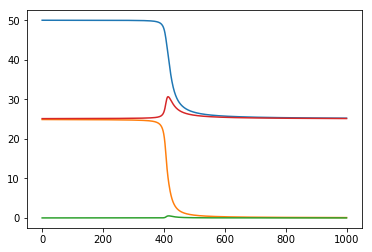

In [19]:
plt.plot(error_total)
plt.plot(error_total0)
plt.plot(error_total1)
plt.plot(error_total2)

# Display Indepentant, dependent, predicted values

In [20]:
a_o, a_h = feedforward(X)
print(np.concatenate((X,y,a_o),axis=1))

[[ 5.1         3.5         1.4         0.2         0.          0.05288735]
 [ 4.9         3.          1.4         0.2         0.          0.05873043]
 [ 4.7         3.2         1.3         0.2         0.          0.05608767]
 [ 4.6         3.1         1.5         0.2         0.          0.06242867]
 [ 5.          3.6         1.4         0.2         0.          0.05265318]
 [ 5.4         3.9         1.7         0.4         0.          0.05324862]
 [ 4.6         3.4         1.4         0.3         0.          0.05714606]
 [ 5.          3.4         1.5         0.2         0.          0.05529186]
 [ 4.4         2.9         1.4         0.2         0.          0.06575659]
 [ 4.9         3.1         1.5         0.1         0.          0.0582784 ]
 [ 5.4         3.7         1.5         0.2         0.          0.05155884]
 [ 4.8         3.4         1.6         0.2         0.          0.05834438]
 [ 4.8         3.          1.4         0.1         0.          0.05837758]
 [ 4.3         3.        